# Skin segmentation 

In this assignement you will train classifier to assign colors to skin or no skin classes. The data is taken from [Skin Segmentation Data Set](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation#) in the UCI Machine Learning repository.

The  data is in a plain text format and contains four columns. First three contain RGB color data  represented as integers in the range 0-255, and the last column is an integer label  with 1 representing skin and 2 representing no skin. This file we can load directly into a numpy array:

You have to install the [scrapbook](https://github.com/nteract/scrapbook) module before using this notebook.  This will help me to automatically scan notebooks  using [papermill](https://github.com/nteract/papermill) module :) 

In [28]:
import numpy as np
import scrapbook as sb
import matplotlib.pyplot as plt
import pandas as pd

Please fill your firstname and name in the cell below.

In [29]:
sb.glue('person1',['Łukasz', 'Lik'], display=True)

['Łukasz', 'Lik']

In [30]:
data = np.loadtxt('data/Skin_NonSkin.txt')

In [31]:
rgb  = data[:,:3]
lbl = data[:,3].astype('int32') # some function expect labels to be integers
print (rgb)
print("----")
print(lbl)

[[ 74.  85. 123.]
 [ 73.  84. 122.]
 [ 72.  83. 121.]
 ...
 [163. 162. 112.]
 [163. 162. 112.]
 [255. 255. 255.]]
----
[1 1 1 ... 2 2 2]


We see that the classes are not balanced:

In [32]:
np.bincount(lbl)

array([     0,  50859, 194198])

## Problem 1 

Compare the performance of the QuadraticDiscriminantAnalysis, LinearDiscriminativeAnalysis and NaiveBayes classifiers on this set. Use the `sklearn` library when needed. Compare the confusion matrices (tnr,  fnr,fpr,tpr), precision and f1_ score and auc_score, as well ROC curves. Prepare a summary table with all the numerical scores one row per classifier and one column per metric (use pandas.DataFame). Plot all  ROC curves on the same plot and label them accordingly. Assume that skin is positive and non-skin negative. 

__Hint__ as you will be repeating this,  it's probably a good idea  to write a python function that does all the analysis. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from colorsys import rgb_to_hsv

In [34]:
def analize(cls, name, train_X, train_Y, test_X, test_Y):
    cls.fit(train_X, train_Y)
    test_pred = cls.predict(test_X)
    test_proba = cls.predict_proba(test_X)[:,1]
    
    tnr, fpr, fnr, tpr = confusion_matrix(test_Y, test_pred, normalize='true').ravel()
    precision =  precision_score(test_Y, test_pred)
    f1 = f1_score(test_Y, test_pred)
    auc = roc_auc_score(test_Y, test_proba)
    fprs, tprs, thds = roc_curve(test_Y, test_proba)
    
    return  pd.DataFrame({'tnr':[tnr], 'fpr':[fpr], 'fnr':[fnr],
                          'tpr':[tpr], 'precision' : [precision],
                          'f1' :[f1],'auc' :[auc]
                           }, index=[name]), fprs, tprs, thds

In [35]:
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

rocs = list()
seed = 2139
rgb_data, rgb_test_data, lbl_data, lbl_test_data = train_test_split(rgb, lbl, test_size=0.25, random_state=seed)
    
df, fprs, tprs, thds = analize(gnb, 'gnb', rgb_data, lbl_data==1, rgb_test_data, lbl_test_data==1)
print("GNB:")
sb.glue("gnb", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
print("\n\n")
rocs.append(("gnb", fprs, tprs,thds))

df, fprs, tprs, thds = analize(lda, 'lda', rgb_data, lbl_data==1, rgb_test_data, lbl_test_data==1)
print("LDA:")
sb.glue("lda", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
print("\n\n")
rocs.append(("lda", fprs, tprs,thds))

df, fprs, tprs, thds = analize(qda, 'qda', rgb_data, lbl_data==1, rgb_test_data, lbl_test_data==1)
print("QDA:")
sb.glue("qda", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
# print("\n\n")
rocs.append(("qda", fprs, tprs,thds))

GNB:


[0.9731997107139168,
 0.026800289286083273,
 0.2648018648018648,
 0.7351981351981351,
 0.8794497629891254,
 0.8008802742392823,
 0.9419197996158426]




LDA:


[0.9389193098460584,
 0.061080690153941526,
 0.09432789432789433,
 0.9056721056721057,
 0.7977005201204489,
 0.8482643184629939,
 0.9473069798495979]




QDA:


[0.9983056100836863,
 0.0016943899163136687,
 0.07420357420357421,
 0.9257964257964258,
 0.9931649579061432,
 0.9582981461374512,
 0.9995866458620876]

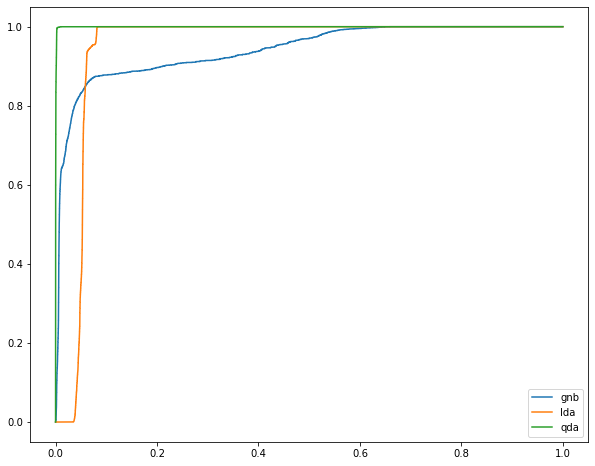

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

for roc in rocs:
    ax.plot(roc[1],roc[2], label=roc[0]);
ax.legend()
sb.glue('ROC',fig, "display", display=False);

In [37]:
lbl.sum()/len(lbl)

1.7924605295910747

## Problem 2

Repeat same analysis but with RGB  data converted to Hue  Saturation Value (HSV) format. You can use the `colorsys` module for conversion. Use the scrapbook again for saving your results appending "\_hsv" to variable name e.g.

In [38]:
sb.glue('qda_hsv',['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc'], display=True)

['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc']

In [39]:
hsv = np.asarray([rgb_to_hsv(*row) for row in rgb]) #inneficient but it does not matter

In [40]:
hsv

array([[6.29251701e-01, 3.98373984e-01, 1.23000000e+02],
       [6.29251701e-01, 4.01639344e-01, 1.22000000e+02],
       [6.29251701e-01, 4.04958678e-01, 1.21000000e+02],
       ...,
       [1.63398693e-01, 3.12883436e-01, 1.63000000e+02],
       [1.63398693e-01, 3.12883436e-01, 1.63000000e+02],
       [0.00000000e+00, 0.00000000e+00, 2.55000000e+02]])

In [41]:
seed = 2139
hsv_data, hsv_test_data, hsv_lbl_data, hsv_lbl_test_data = train_test_split(hsv, lbl, test_size=0.25, random_state=seed)
hsv_rocs = list()

qda = QuadraticDiscriminantAnalysis()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

df, fprs, tprs, thds = analize(gnb, 'hsv gnb', hsv_data, hsv_lbl_data==1, hsv_test_data, hsv_lbl_test_data==1)
print("HSV GNB:")
sb.glue("hsv_gnb", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
print("\n\n")
hsv_rocs.append(("hsv_gnb", fprs, tprs,thds))

df, fprs, tprs, thds = analize(lda, 'hsv lda', hsv_data, hsv_lbl_data==1, hsv_test_data, hsv_lbl_test_data==1)
print("HSV LDA:")
sb.glue("hsv_lda", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
print("\n\n")
hsv_rocs.append(("hsv_lda", fprs, tprs,thds))

df, fprs, tprs, thds = analize(qda, 'hsv qda', hsv_data, hsv_lbl_data==1, hsv_test_data, hsv_lbl_test_data==1)
print("HSV QDA:")
sb.glue("hsv_qda", [df['tnr'][0], df['fpr'][0], df['fnr'][0], df['tpr'][0], df['precision'][0], df['f1'][0], df['auc'][0]], display=True)
# print(df)
# print("\n\n")
hsv_rocs.append(("hsv_qda", fprs, tprs,thds))

HSV GNB:


[0.9858043186279575,
 0.014195681372042567,
 0.00473970473970474,
 0.9952602952602952,
 0.9490960284528749,
 0.9716301297125085,
 0.9972006714686744]




HSV LDA:


[0.89308812893894,
 0.10691187106106002,
 0.0,
 1.0,
 0.7132564841498559,
 0.832632464255677,
 0.9282403954828792]




HSV QDA:


[0.9949788201260461,
 0.005021179873953921,
 0.01181041181041181,
 0.9881895881895882,
 0.9812514466476352,
 0.9847082962332082,
 0.9994577933001323]

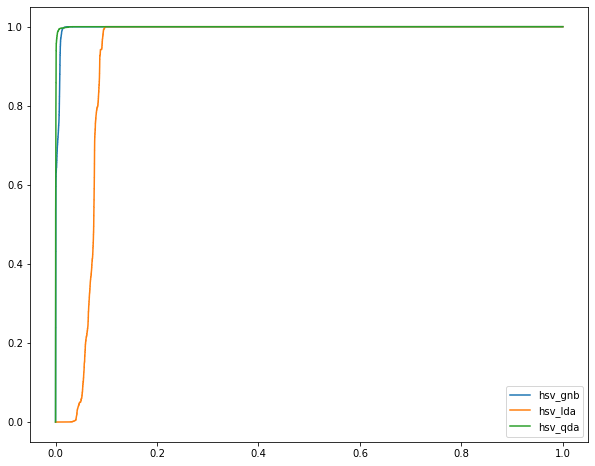

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
#plot ROCs
for roc in hsv_rocs:
    ax.plot(roc[1],roc[2], label=roc[0]);
ax.legend()
sb.glue('ROC_hsv',fig, "display", display=False);